In [1]:
# Import required libraries
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("utils"))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("Configurations"))))
from utils import chartChecker as check
from utils import simulaltionUtils
from utils import plotUtils
from utils import dataframeUtil
from utils import statisticsUtils
from simulation import simulateTrend
from simulation import simulateShift
import Configurations as setting
import pandas as pd
import numpy as np
import statistics
import datetime
import matplotlib.pyplot as plt
from random import randrange
import matplotlib.patches as patches

Zeitreihen des Qualitätsmerkmals simulieren

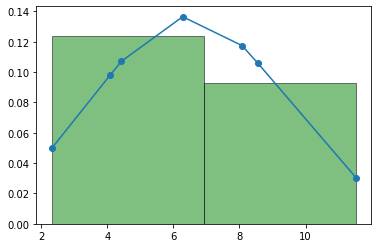

Sensor
2022-01-10 00:00:00   8.077713
2022-01-10 00:00:01   8.547167
2022-01-10 00:00:02   2.317575
2022-01-10 00:00:03  11.527281
2022-01-10 00:00:04   4.095597

In [2]:
# Simulation for 50 Seconde
normalDistribution = simulaltionUtils.getNormalDistribution(setting.mean, setting.standardDeviation,setting.n)
#print(normalDistribution)
plotUtils.plotNormalDistribution(normalDistribution)
df = simulaltionUtils.getTimeSeries(normalDistribution, len(normalDistribution))
df.head()

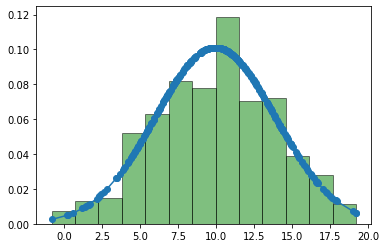

In [3]:
# Simulation for 50*50 Seconde
normalDistribution = simulaltionUtils.getNormalDistributedTimeSeries(50)
plotUtils.plotNormalDistribution(normalDistribution)


In [4]:
print(len(normalDistribution))
df = simulaltionUtils.getTimeSeries(normalDistribution, len(normalDistribution))
df

350


Sensor
2022-01-10 00:00:00  10.916901
2022-01-10 00:00:01  10.958935
2022-01-10 00:00:02   6.960389
2022-01-10 00:00:03  11.378097
2022-01-10 00:00:04  13.353472
...                        ...
2022-01-10 00:05:45  -0.822084
2022-01-10 00:05:46  11.912868
2022-01-10 00:05:47  11.711502
2022-01-10 00:05:48   9.206053
2022-01-10 00:05:49   9.970580

[350 rows x 1 columns]

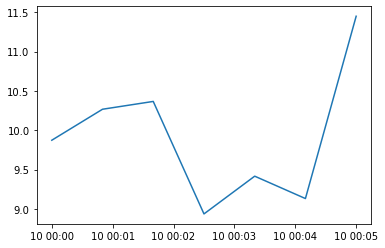

In [5]:
# Aufsummieren
resample = df["Sensor"].resample('50S').mean()
plt.plot(resample)

<AxesSubplot:title={'center':'Regelkarte'}, xlabel='Zeit', ylabel='Werte'>

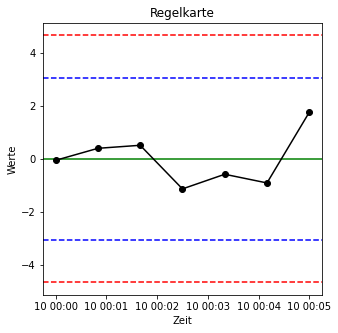

In [6]:
# Regelkarte
normalized_df=(resample-resample.mean())/resample.std()
plotUtils.plotChart(normalized_df,"Regelkarte")


[-1.5985718202652643, -0.07377444812116124, -0.9078051752572389, -1.495774020095473, -1.543061831943951, -0.9943674766648055, -1.3578036621459089, -1.269435004518383, -0.9672892720673295, -1.6672304125253368]
(-0.04677621100085887, -0.9770183628566204)


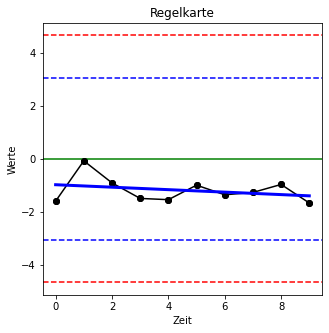

In [7]:
#shift up chart
meanList = simulateShift.generateShiftMeanList(2,10,-1)
chart = simulateShift.simulateOneShiftChart(meanList,-1)
print(chart)
plotUtils.plotChart(chart,"Regelkarte")
slope = plotUtils.plotSlope(chart)
print(slope)


(0.09605091071815801, -1.0784665764409935)


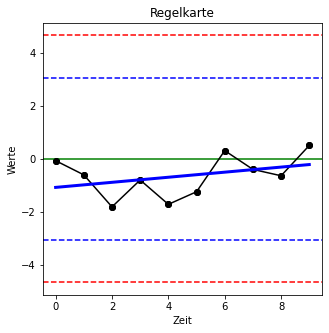

In [8]:
#shift Down chart
meanList = simulateShift.generateShiftMeanList(2,10,-1)
chart = simulateShift.simulateOneShiftChart(meanList,-1)
plotUtils.plotChart(chart,"Regelkarte")
slope = plotUtils.plotSlope(chart)
print(slope)


In [9]:
# Trend Chart
setting.standardDeviation = 4
trendStart = 1
trendEnd = setting.n
#m_slope=setting.standardDeviation*0.2
print(m_slope )
meansList = simulateTrend.generateTrendMeanList(trendStart, trendEnd,1.3,"up")
chart = simulaltionUtils.getOneChart(meansList=meansList,standardDeviation=setting.standardDeviation)

plotUtils.figsize=5
slope,_ = plotUtils.plotChartWithSlope(chart["x"][0],"Regelkart",True)
plt.text(1.25, 1, "die Steigung der Regressionsgerade = {:.2f}".format(slope))
print('slope:',slope)


NameError: name 'm_slope' is not defined

using std=4
y = 0.68x -0.51
x = 1.20


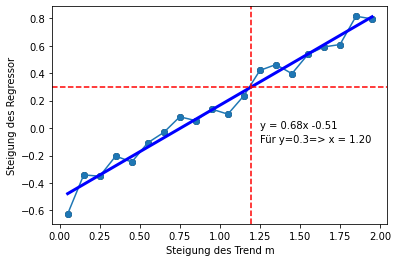

In [ ]:
# find slope m for Trend simulation
trend_muster_slope_m_list=[]
regression_line_slope_list=[]
min_regression_line_slope = 0.3

founden_min_regression_line_slope = 10 # Startwert
trend_slope_m = 0.05
# Der Steigung wird 20 um 0.1 erhöht
for _ in range(20):
    # Aus einem 200 Simulation mit dem gleichen Parameter wird der minimale Regressionsgrad ermittelt
    for _ in range(200):
        meansList = simulateTrend.generateTrendMeanList(trendStart, trendEnd,trend_slope_m,"up")
        chart = simulaltionUtils.getOneChart(meansList=meansList,standardDeviation=configurations.standardDeviation)
        regressor_slope,_,_,_ = statisticsUtils.getLinRegParam(chart["x"][0])
        if regressor_slope[0]< founden_min_regression_line_slope :
         founden_min_regression_line_slope  = regressor_slope[0]
    regression_line_slope_list.append(founden_min_regression_line_slope )
    trend_muster_slope_m_list.append(trend_slope_m)
    founden_min_regression_line_slope = 10 # Startwert wiedergestellt
    trend_slope_m = trend_slope_m + 0.1

plt.plot(trend_muster_slope_m_list,regression_line_slope_list, marker='o')
slopeReg,interceptor = plotUtils.plotRegSlope(trend_muster_slope_m_list,regression_line_slope_list)
x_for_min_regression_line_slope = (min_regression_line_slope-interceptor)/slopeReg


plt.xlabel('Steigung des Trend m')
plt.ylabel('Steigung des Regressor')
plt.axhline(min_regression_line_slope, color='r', linestyle='--')
plt.axvline(x_for_min_regression_line_slope, color='r', linestyle='--')
print("using std="+str(configurations.standardDeviation))
eq = 'y = {:.2f}x {:.2f}'.format(slopeReg,interceptor)
print(eq)
print('x = {:.2f}'.format(x_for_min_regression_line_slope))
plt.text(1.25, 0, eq)
plt.text(1.25, -0.1, "Für y="+str(min_regression_line_slope)+'=> x = {:.2f}'.format(x_for_min_regression_line_slope))
plt.savefig(configurations.plotPath+'findeSlope.png',dpi=300)

-0.15525087006167068 0.24262523550235826


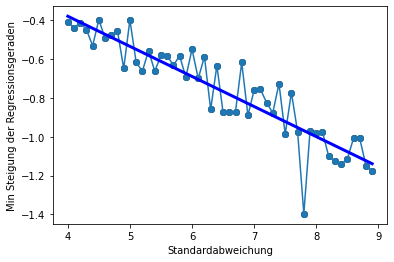

In [ ]:
# min slope
trend_muster_slope=[]
regression_line_slope=[]
setting.standardDeviation = 4
min_regression_line_slope= 10
#slope_in = 0.9
slope_in = setting.standardDeviation
for s in range(50):
    for i in range(400):
        meansList = simulateTrend.generateTrendMeanList(trendStart, trendEnd,0.2,"up")
        chart = simulaltionUtils.getOneChart(meansList=meansList,standardDeviation=setting.standardDeviation)
        slope,_,_,_ = statisticsUtils.getLinRegParam(chart["x"][0])
        if slope[0]< min_regression_line_slope:
         min_regression_line_slope = slope[0]
    #print("min_regression_line_slope =",min_regression_line_slope)
    regression_line_slope.append(min_regression_line_slope)
    trend_muster_slope.append(slope_in)
    min_regression_line_slope = 10
    slope_in = slope_in + 0.1
    setting.standardDeviation = slope_in
    #print(setting.standardDeviation)
#print(trend_muster_slope)
#print(regression_line_slope)

plt.plot(trend_muster_slope,regression_line_slope, marker='o')
x= np.array(trend_muster_slope).reshape(-1, 1)
slopeReg,interceptor = plotUtils.plotRegSlope(x,regression_line_slope)
plt.xlabel('Standardabweichung')
plt.ylabel('Min Steigung der Regressionsgeraden')
print(slopeReg,interceptor)

34.25617768942287


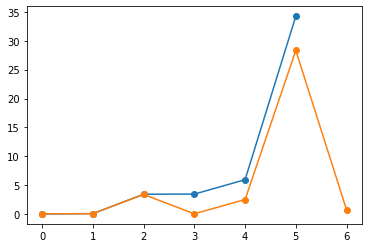

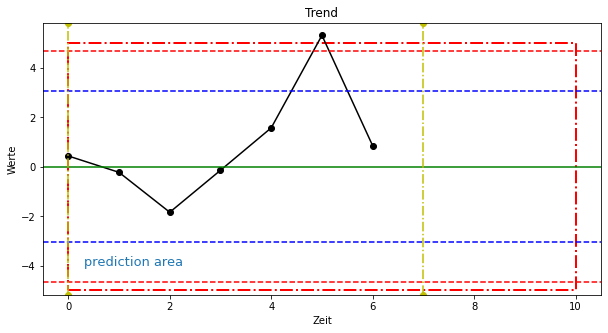

In [ ]:
# analye
st = statisticsUtils.squaresTotal(chart['x'][0][0:10],0)
sst = statisticsUtils.sumOfSquaresTotal(st)
print(sst[len(sst)-1])
plt.plot(sst,marker='o')
plt.plot(st, marker='o')
#print(statisticsUtils.Average(st[0:3])-statisticsUtils.Average(st[len(st)-3:len(st)-1]) )
#print(statisticsUtils.Average(chart['x'][0][0:4])-statisticsUtils.Average(chart['x'][0][8:11]) )


plotUtils.figsize=10
chart = chart['x'][0]
predctionStart = 0
predctionTitle = "prediction area"
title  ="Trend"
classificationStart=0
classificationEnd=trendEnd
plotUtils.plotChartWithDetectionBox(chart,predctionStart,predctionTitle,classificationStart,classificationEnd,title)

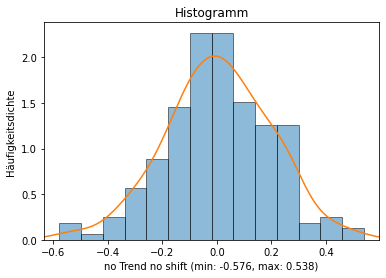

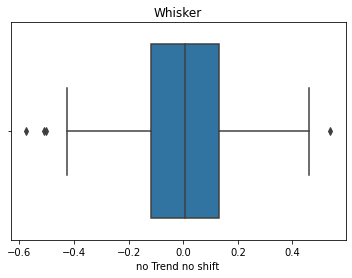

<Figure size 432x288 with 0 Axes>

In [ ]:
# slope analye
df = statisticsUtils.getLinRegParaDataFrame(setting.trendUptrainDatasetName,setting.targetColumName_trendUp,0.0)
x = df.slops.values
plotUtils.plotMetricHistogram(x,"no Trend no shift","_Demo")
plt.savefig('foo.png')

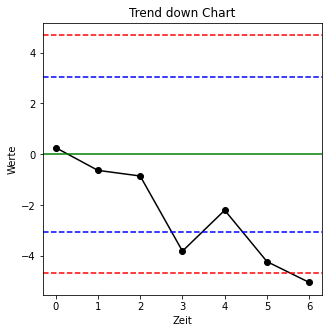

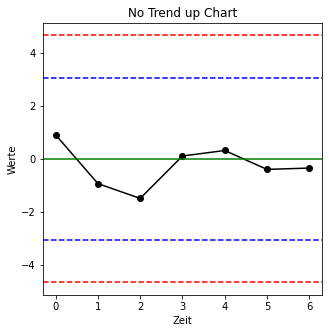

In [ ]:
plotUtils.figsize=5
row = dataframeUtil.getRandomChartFrom_csv(setting.trendDowntrainDatasetName,setting.trendDownChartPlotTitle,-1)
row = dataframeUtil.getRandomChartFrom_csv(setting.trendUptrainDatasetName,setting.trendUpChartPlotTitle,-1)

In [ ]:
test_df = pd.read_csv("../"+setting.testDatasetName)
from numpy import random
mu, sigma,j = 10, 4 , 50
x_i = random.normal(mu, sigma, j)


FileNotFoundError: [Errno 2] No such file or directory: '../dataset/testdata.csv'